In [1]:
import tensorflow as tf
import zfit
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy

/opt/anaconda3/envs/m2_req/lib/python3.10/site-packages/zfit/__init__.py:59: UserWarning: TensorFlow warnings are by default suppressed by zfit. In order to show them, set the environment variable ZFIT_DISABLE_TF_WARNINGS=0. In order to suppress the TensorFlow warnings AND this warning, set ZFIT_DISABLE_TF_WARNINGS=1.
  warnings.warn(


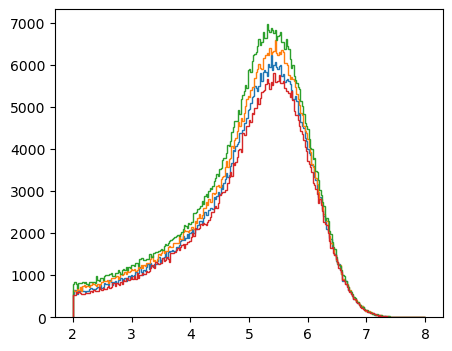

In [3]:
data_674 = zfit.Data.from_root("mu2e_caloSimu_crySpec674_HS.root", "specTree", ["spec", "ratio", "ntrig", "stim", "time", "tErg"]) #importing data from root file
data_675 = zfit.Data.from_root("mu2e_caloSimu_crySpec675_HS.root", "specTree", ["spec", "ratio", "ntrig", "stim", "time", "tErg"]) #importing data from root file
data_684 = zfit.Data.from_root("mu2e_caloSimu_crySpec684_HS.root", "specTree", ["spec", "ratio", "ntrig", "stim", "time", "tErg"]) #importing data from root file
data_692 = zfit.Data.from_root("mu2e_caloSimu_crySpec692_HS.root", "specTree", ["spec", "ratio", "ntrig", "stim", "time", "tErg"]) #importing data from root file

cryspec = zfit.Space(['x'], limits=(2,8)) #observable range:: 1.5 limit is placed in fcl file

energy_unbinned_674 = zfit.Data(data_674["spec"],obs=cryspec) #zfit.Data is used for unbinned data, obs has to be specified
energy_unbinned_675 = zfit.Data(data_675["spec"],obs=cryspec) #zfit.Data is used for unbinned data, obs has to be specified
energy_unbinned_684 = zfit.Data(data_684["spec"],obs=cryspec) #zfit.Data is used for unbinned data, obs has to be specified
energy_unbinned_692 = zfit.Data(data_692["spec"],obs=cryspec) #zfit.Data is used for unbinned data, obs has to be specified
bin_count = 260 #trivially set depending on what we want the y axis to represent (x evts/kev)
plt.figure(figsize=(5,4))
energy_binned_674, bin_location_674,_ = plt.hist(energy_unbinned_674,bins=bin_count,histtype='step',range=(2,8)) #binning energy values and creating an x array of bin location
energy_binned_675, bin_location_675,_ = plt.hist(energy_unbinned_675,bins=bin_count,histtype='step',range=(2,8))
energy_binned_684, bin_location_684,_ = plt.hist(energy_unbinned_684,bins=bin_count,histtype='step',range=(2,8))
energy_binned_692, bin_location_692,_ = plt.hist(energy_unbinned_692,bins=bin_count,histtype='step',range=(2,8))
#bin_centers =  (bin_location[1:] + bin_location[:-1])/2

x_range= cryspec.area() 
#scale = (len(energy_unbinned)/bin_count)*x_range #the pdfs are normalised to =1 so must apply scaling factor


In [4]:
from scipy.signal import find_peaks


In [5]:
peak_inx, _ = find_peaks(data_674)

ValueError: All axes have to be in the space.